In [94]:
# COE379L - Project 1
# Oneza Vhora

In [95]:
# Part 1: Perform exploratory data analysis on the dataset
import pandas as pd
data = pd.read_csv('project1.csv')
print(data.shape)

(386, 10)


In [96]:
# Basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.3+ KB


In [97]:
# Finding duplicates
# Deleting duplicates
duplicate_count = data.duplicated().sum()
print(duplicate_count)
data=data.drop_duplicates()
print(data.shape)

11
(375, 10)


In [98]:
#Finding missing values
print(data.isnull().sum())

# Using another df, since the following code will convert the data to string
df = pd.read_csv('project1.csv')

# Identify and print rows that contain '*' or '?' in any column
df_with_symbols = df[df.astype(str).apply(lambda x: x.str.contains(r'[*?]', regex=True)).any(axis=1)]
print(df_with_symbols)

class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64
                    class    age menopause tumor-size inv-nodes node-caps  \
6       recurrence-events  50-59   premeno      25-29       0-2        no   
7       recurrence-events  60-69      ge40      20-24       0-2         *   
22      recurrence-events  30-39   premeno      25-29       0-2         *   
30   no-recurrence-events  50-59      ge40      40-44       0-2         *   
63   no-recurrence-events  20-29   premeno      35-39       0-2        no   
90   no-recurrence-events  30-39   premeno        0-4       0-2        no   
97   no-recurrence-events  60-69      ge40      15-19       0-2         *   
133  no-recurrence-events  50-59      ge40      40-44       0-2        no   
145  no-recurrence-events  40-49   premeno      25-29       0-2         ?   
163  no-recurrence-events  60-69      ge40     

In [99]:
# Replace '?' and '*' with NaN
data.replace({'?': np.nan, '*': np.nan}, inplace=True)
data.isnull().sum()

class           0
age             0
menopause       0
tumor-size      1
inv-nodes       1
node-caps      12
deg-malig       0
breast          0
breast-quad     6
irradiat        0
dtype: int64

In [100]:
# Filling missing values with mode, since the missing columns is categorical
data.fillna(data.mode().iloc[0], inplace=True)
data.isnull().sum()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [101]:
# Checking if null again
data.isnull().values.any()

False

In [102]:
# Changing all columns to categorical
# all columns are object, besides deg-malig, which is only either 1, 2 or 3
data = data.astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        375 non-null    category
 1   age          375 non-null    category
 2   menopause    375 non-null    category
 3   tumor-size   375 non-null    category
 4   inv-nodes    375 non-null    category
 5   node-caps    375 non-null    category
 6   deg-malig    375 non-null    category
 7   breast       375 non-null    category
 8   breast-quad  375 non-null    category
 9   irradiat     375 non-null    category
dtypes: category(10)
memory usage: 8.5 KB


/tmp/ipykernel_2359/1529117402.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], order=data[col].value_counts().index, palette="viridis")
/tmp/ipykernel_2359/1529117402.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], order=data[col].value_counts().index, palette="viridis")
/tmp/ipykernel_2359/1529117402.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], order=data[col].value_counts().index, palette="viridis")
/tmp/ipykernel_2359/1529117402.py:14: FutureWarning: 

Passing `palette` withou

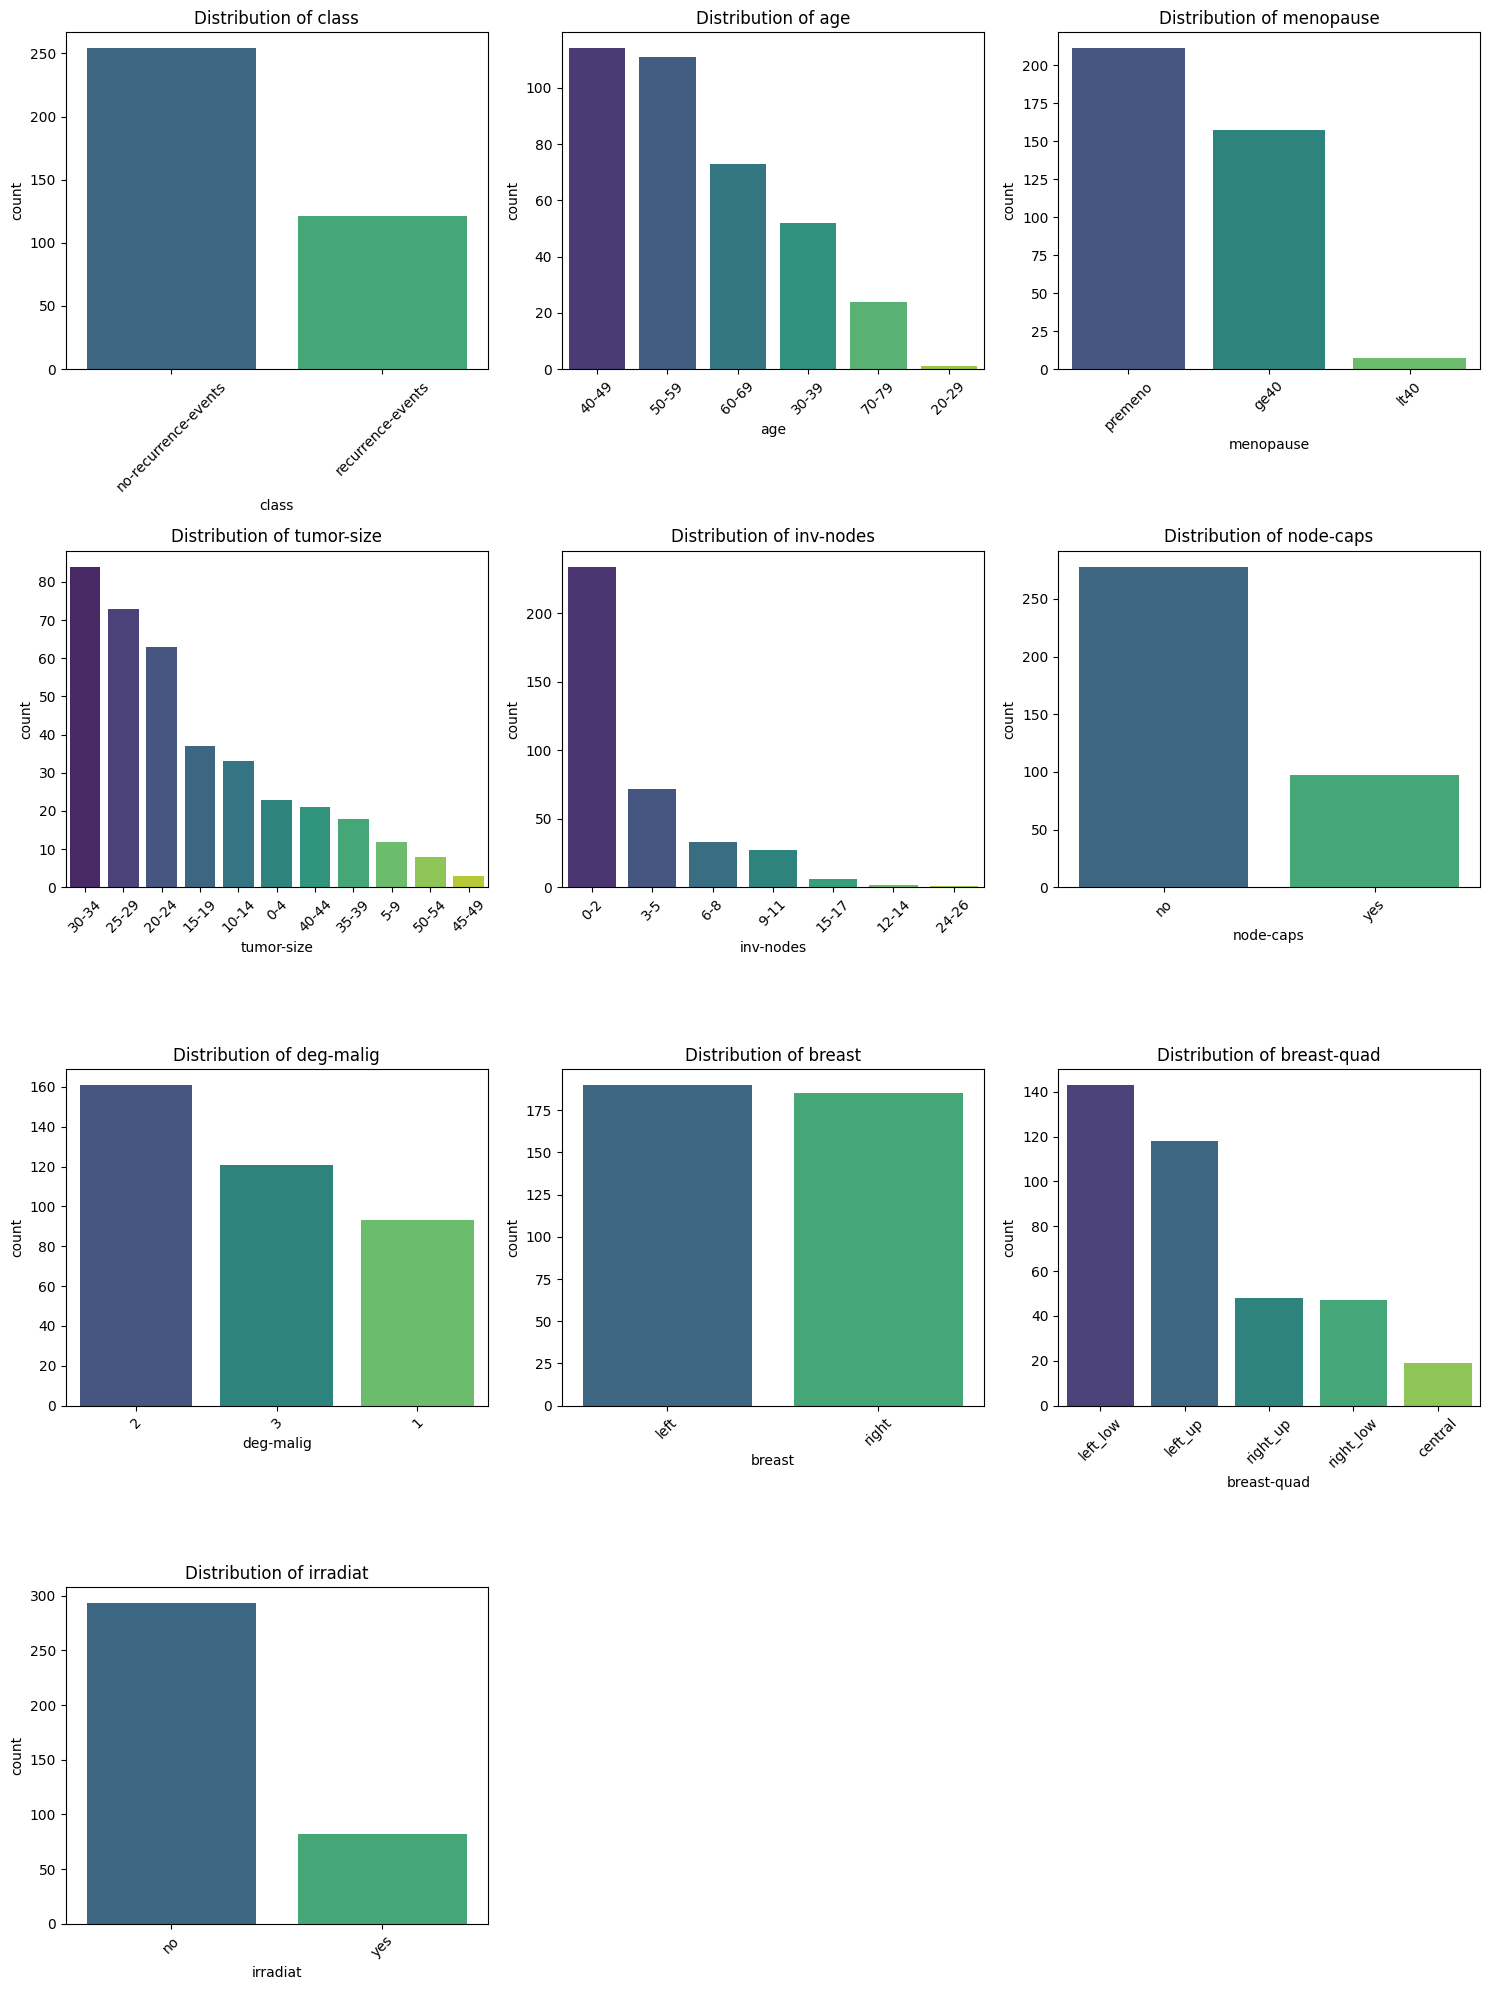

In [103]:
# analyzing data
import matplotlib.pyplot as plt
import seaborn as sns
import math

# num of cols and rows
num_columns = len(data.columns)
# adjust the number of rows to fit all columns
num_rows = math.ceil(num_columns / 3)

plt.figure(figsize=(15, 5*num_rows))
for i, col in enumerate(data.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.countplot(x=data[col], order=data[col].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

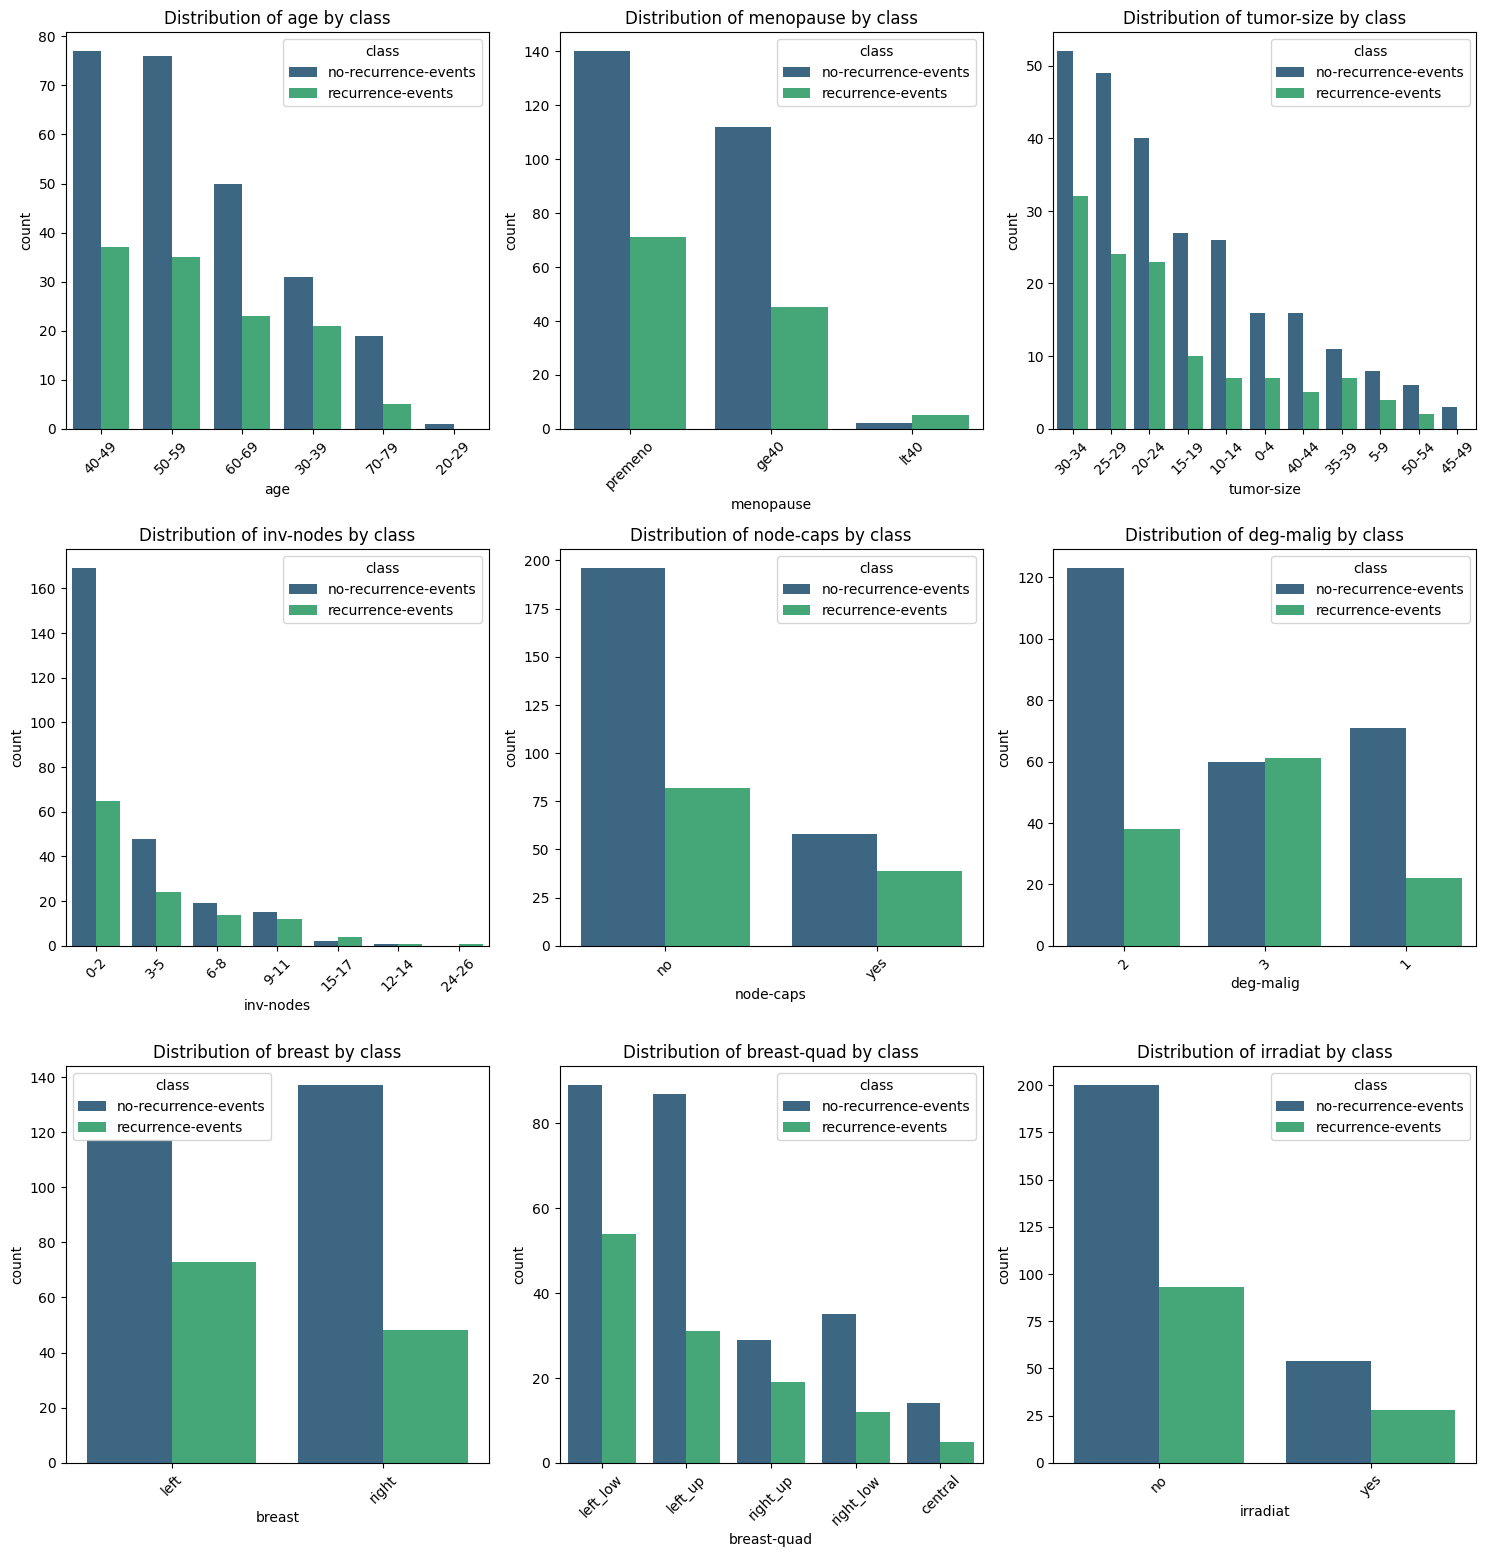

In [104]:
# comparing all columns besides 'class' with 'class' column
plt.figure(figsize=(15, 5*num_rows))
for i, col in enumerate(data.columns):
    if col != 'class':  # Exclude 'class' from being plotted on x-axis
        plt.subplot(num_rows, 3, i)
        sns.countplot(x=data[col], hue=data['class'], order=data[col].value_counts().index, palette="viridis")
        plt.title(f'Distribution of {col} by class')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

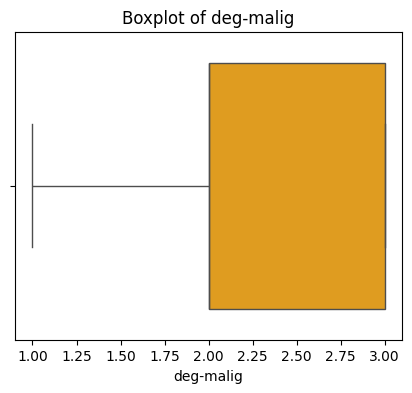

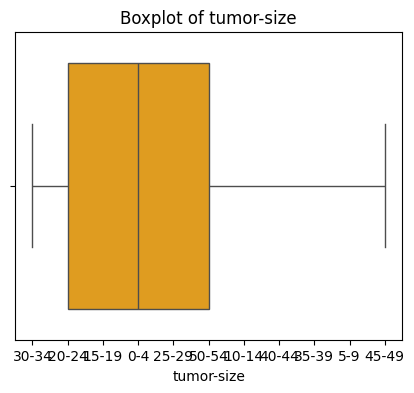

In [105]:
# viewing 'deg-malig' and 'tumor size' boxplot
plt.figure(figsize=(5, 4))
sns.boxplot(x=df["deg-malig"], color="orange")
plt.title("Boxplot of deg-malig")
plt.show()

plt.figure(figsize=(5, 4))
sns.boxplot(x=df["tumor-size"], color="orange")
plt.title("Boxplot of tumor-size")
plt.show()

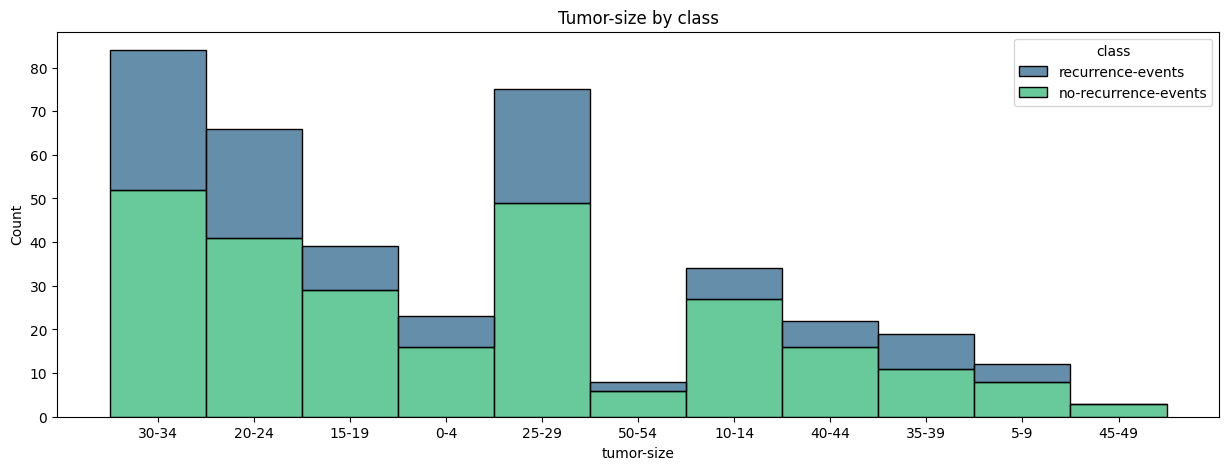

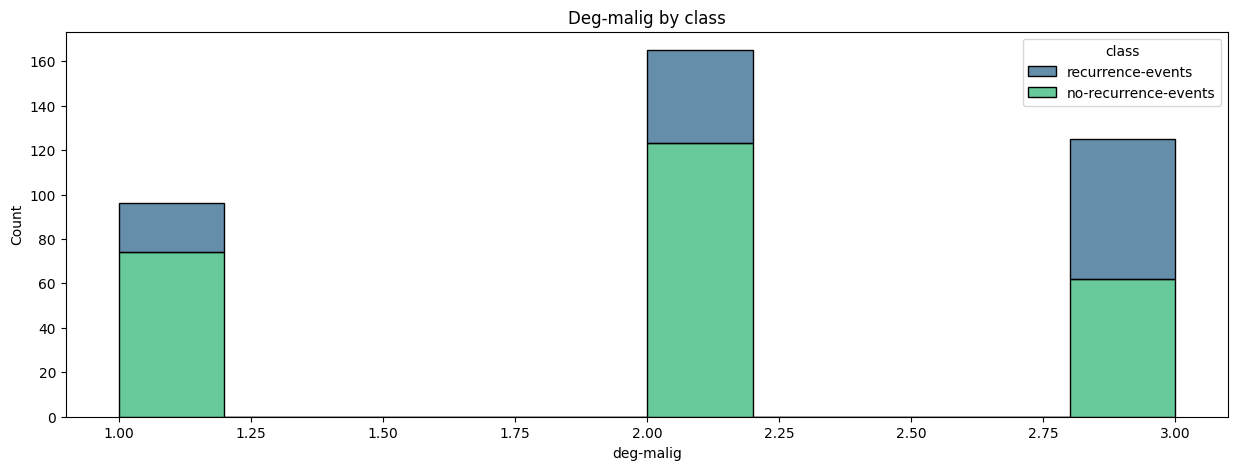

In [106]:
# histplot of dem-malig and tumor size with respect to class
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="tumor-size", hue="class", multiple="stack", palette="viridis")
plt.title("Tumor-size by class")
plt.show()

plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="deg-malig", hue="class", multiple="stack", palette="viridis")
plt.title("Deg-malig by class")
plt.show()

In [107]:
# Check the number of unique values in each categorical column
categorical_columns = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']
unique_values = data[categorical_columns].nunique()
print(unique_values)

class           2
age             6
menopause       3
tumor-size     11
inv-nodes       7
node-caps       2
breast          2
breast-quad     5
irradiat        2
dtype: int64


In [108]:
# One-hot encode columns with more than two unique values
columns_to_encode = unique_values[unique_values > 2].index.tolist()
data_encod = pd.get_dummies(data, columns=columns_to_encode)

In [109]:
#Part 2: Fit Classification models on the data to predict the recurrence class
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# One-hot encode columns with more than two unique values
categorical_columns = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Split the data into features and target
X = data_encoded.drop('class', axis=1) # Features
y = data_encoded['class'].cat.codes # Target

# Split the data into training and testing sets
# 70% training, 30% testing, stratified by target, random state is 1 for deterministic results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

# Check class distribution in training and testing sets
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

0    0.675573
1    0.324427
Name: proportion, dtype: float64
0    0.681416
1    0.318584
Name: proportion, dtype: float64


In [111]:
# Fit and evaluate the K-Nearest Neighbor Classifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Predict the target values
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print("K-Nearest Neighbor Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

K-Nearest Neighbor Classifier
Accuracy: 0.584070796460177
Classification Report:               precision    recall  f1-score   support

           0       0.67      0.78      0.72        77
           1       0.26      0.17      0.20        36

    accuracy                           0.58       113
   macro avg       0.46      0.47      0.46       113
weighted avg       0.54      0.58      0.55       113

Confusion Matrix: [[60 17]
 [30  6]]


In [112]:
# Fit and evaluate the K-Nearest Neighbor Classifier with Grid Search CV
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Predict the target values
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
print("K-Nearest Neighbor Classifier with Grid Search CV")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))


K-Nearest Neighbor Classifier with Grid Search CV
Best Parameters: {'n_neighbors': 10}
Accuracy: 0.6283185840707964
Classification Report:               precision    recall  f1-score   support

           0       0.67      0.90      0.77        77
           1       0.20      0.06      0.09        36

    accuracy                           0.63       113
   macro avg       0.43      0.48      0.43       113
weighted avg       0.52      0.63      0.55       113

Confusion Matrix: [[69  8]
 [34  2]]


In [113]:
# Fit and evaluate the Logistic Regression Classifier
log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train_scaled, y_train)

# Predict the target values
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Logistic Regression Classifier
Accuracy: 0.6283185840707964
Classification Report:               precision    recall  f1-score   support

           0       0.68      0.84      0.76        77
           1       0.33      0.17      0.22        36

    accuracy                           0.63       113
   macro avg       0.51      0.51      0.49       113
weighted avg       0.57      0.63      0.59       113

Confusion Matrix: [[65 12]
 [30  6]]
